In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'Times New Roman'

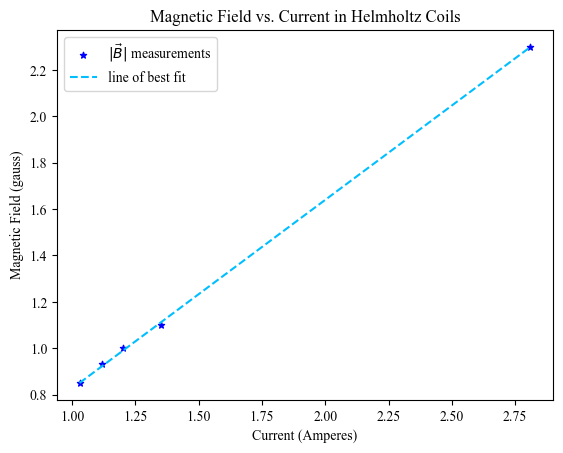

In [ ]:
b_field = [0.85,1.00,2.30,0.93,1.10]
current = [1.03,1.2,2.81,1.12,1.35]

b_field.sort(), current.sort()
plt.figure()
plt.scatter(current, b_field, color='blue', marker='*', s=21, label=r'$|\vec{B}|$ measurements')
line_x, line_y = [current[0], current[-1]], [b_field[0], b_field[-1]]
plt.plot(line_x, line_y, linestyle='dashed', color='deepskyblue', label='line of best fit')
plt.title('Magnetic Field vs. Current in Helmholtz Coils')
plt.xlabel('Current (Amperes)')
plt.ylabel('Magnetic Field (gauss)')
plt.legend()
#plt.savefig('b_field.png')
plt.show()

Experiment 1 Data

[0.055, 0.054, 0.045, 0.053, 0.022]
[8.5e-05 9.3e-05 1.1e-04 1.0e-04 2.3e-04]
velocities: [8398135.64236106, 8906333.830530312, 8906333.830530312, 9377686.299590915, 9377686.299590915]
e/m: [18347679373159.082, 17882289649952.79, 18406285072951.734, 17799928800284.797, 19528503804152.547]


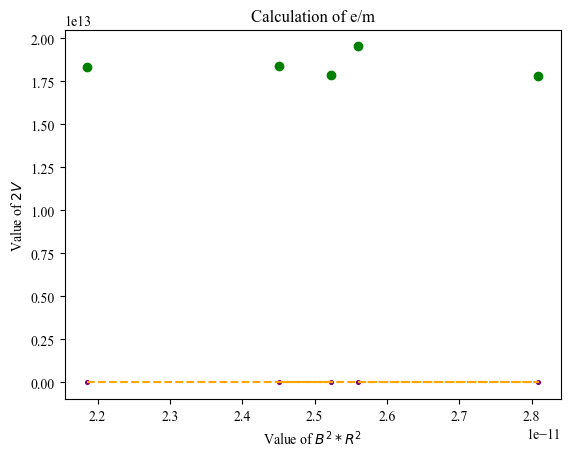

In [19]:
voltages = [200.5, 225.5, 225.5, 250, 250]
b = np.array([0.85, 0.93, 1.10, 1.00, 2.3], float)
radii = [0.055, 0.054, 0.045, 0.053, 0.022]
gauss_to_tesla = 0.0001
b *= gauss_to_tesla
m_elec = 9.1093837e-31
e = 1.60217663e-19

print(radii)
print(b)

velocities = [ (2 * e * V / m_elec) ** 0.5 for V in voltages]
print("velocities:", velocities)

e_m = [ 2 * voltages[i] / (b[i]**2 * radii[i]**2) for i in range(len(b)) ]
print('e/m:', e_m)

x = [b[i] ** 2 * radii[i] ** 2 for i in range(len(b))]
y = [2 * V for V in voltages]
plt.figure()
plt.scatter(x, e_m, color='green')
plt.scatter(x, y, color='purple', s=7)
plt.title('Calculation of e/m')
plt.xlabel('Value of $B^2 * R^2$')
plt.ylabel('Value of $2V$')
plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x), linestyle='dashed', color='orange')
plt.show()

In [22]:
nloop = 130
mu = 4 * np.pi * 10 ** -7
rad = 0.15
b_new = []

def b(current):
    return 8 * mu * nloop * current / (5 ** (3/2) * rad)

for current in [1.03, 1.12, 1.35, 1.2, 2.81]:
    print(b(current) * 10**4)
    b_new.append(b(current))

8.026646975883548
8.728004478630655
10.520362541206593
9.351433369961414
21.89793980799298


8.39813564236106
8.906333830530311
8.906333830530311
9.377686299590916
9.377686299590916


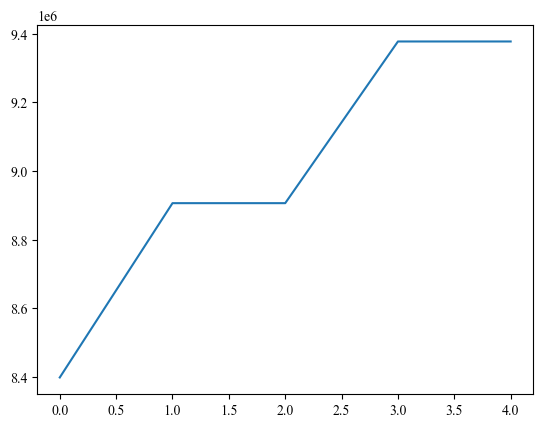

In [51]:
velocities = [ (2 * e * V / m_elec) ** 0.5 for V in voltages]
for vel in velocities:
    print(vel / 1e6)

plt.figure()
plt.plot(velocities)
plt.show()

2.057551283943866
2.0302947956201023
2.0122878353587015
2.0354568377547784
2.1543592580238555
avg 2.0579900021402606
stdev 0.05030046115725081
err 0.024455742825895865


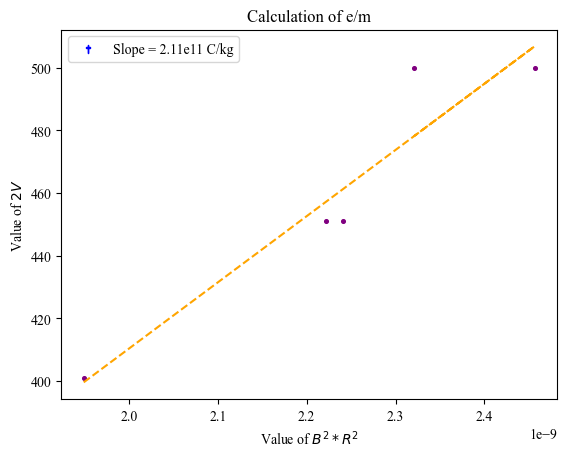

In [52]:
e_m = [ 2 * voltages[i] / (b_new[i]**2 * radii[i]**2) for i in range(len(b_new)) ]
for val in e_m:
    print(val / 1e11)

print("avg",sum(e_m)/len(e_m) / 1e11)
print("stdev", np.std(e_m) / 1e11)

print("err", np.average( [np.std(e_m)/e_m[j] for j in range(len(e_m)) ]))

p = np.polyfit(x, y, 1)
slope = p[0] / 1e11

x = [(b_new[i] ** 2) * (radii[i] ** 2) for i in range(len(b_new))]
y = [2 * V for V in voltages]
plt.figure()
plt.scatter(x, y, color='purple', s=7)
plt.title('Calculation of e/m')
plt.xlabel('Value of $B^2 * R^2$')
plt.ylabel('Value of $2V$')
plt.scatter([], [], color='blue', marker=r'$\dagger$', label=f"Slope = {slope:.2f}e11 C/kg")
plt.legend()
plt.plot(x, np.poly1d(p)(x), linestyle='dashed', color='orange')
plt.show()

Experiment 2

In [59]:
lambda_experimental = np.array([1.14, 1.05, 9.85e-1, 9.23e-1, 8.62e-1], float)
print(np.average(lambda_experimental))
lambda_theory = np.array([1.12, 1.04, 9.68e-1, 9.12e-1, 8.66e-1], float)
print(np.average(lambda_theory))

err = abs(lambda_theory - lambda_experimental) / lambda_theory * 100
print(np.average(err))

print(np.std(lambda_experimental))
print(np.std(lambda_experimental)/np.average(lambda_experimental)*100)

0.992
0.9812
1.2342970419343087
0.09693090322492613
9.771260405738522


Experiment 3

9.1093837e-31 1.60217663e-19


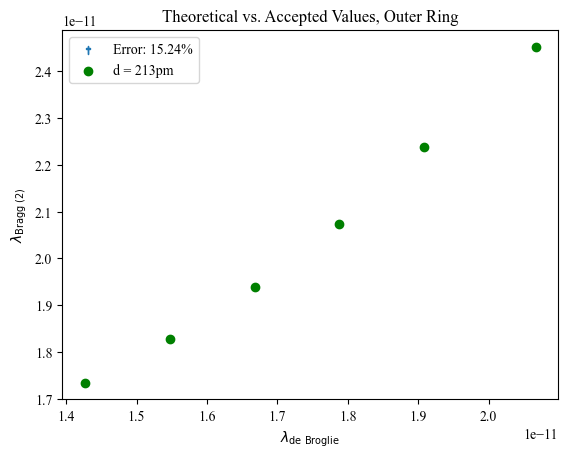

In [84]:
voltages = [2500, 3000, 3500, 4000, 4500, 5000][::-1]
in_rings = [0.029, 0.027, 0.026, 0.025, 0.024, 0.023][::-1]
out_rings = [0.051, 0.047, 0.044, 0.041, 0.038, 0.035][::-1]

L = 130e-3
D = 100e-3
d1 = 123e-12
d2 = 213e-12
h = 6.62607015e-34
print(m_elec, e)
def lam_sin(D, D_12, L):
    return D * np.sin(D_12 / (2 * D)) / (4 * L)
def lam_theo(h, m, e, U):
    return h / (2 * m * e * U)**0.5

def lam(d, D, D_12, L):
    return 2 * d * lam_sin(D, D_12, L)

lambdas_theo = np.array([lam_theo(h, m_elec, e, volt) for volt in voltages], float)
lambdas_in = np.array([lam(d1, D, i, L) for i in in_rings], float)
lambdas_o = np.array([lam(d2, D, o, L) for o in out_rings], float)

err = np.average(abs(lambdas_theo - lambdas_o) / lambdas_theo * 100 )

plt.figure()
plt.title('Theoretical vs. Accepted Values, Outer Ring')
plt.xlabel(r'$\lambda_{\text{de Broglie}}$')
plt.ylabel(r'$\lambda_{\text{Bragg (2)}}$')
plt.scatter([],[], marker='$\dagger$', label=f'Error: {err:.2f}%')
#plt.scatter(lambdas_in, lambdas_theo, color='red', label='d = 123pm')
plt.scatter(lambdas_o, lambdas_theo, color='green', label='d = 213pm')
plt.legend()
plt.show()

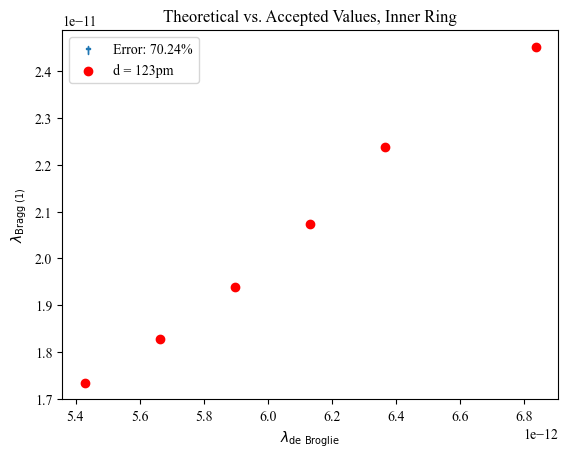

In [86]:
plt.figure()
plt.title('Theoretical vs. Accepted Values, Inner Ring')
plt.xlabel(r'$\lambda_{\text{de Broglie}}$')
plt.ylabel(r'$\lambda_{\text{Bragg (1)}}$')

err = np.average(abs(lambdas_theo - lambdas_in) / lambdas_theo * 100 )
plt.scatter([],[], marker='$\dagger$', label=f'Error: {err:.2f}%')
plt.scatter(lambdas_in, lambdas_theo, color='red', label='d = 123pm')
plt.legend()
#plt.scatter(lambdas_o, lambdas_theo, color='green', label='d = 213pm')
plt.show()

In [ ]:
for j in range(len(lambdas_theo)):
    print(abs(lambdas_theo[j] - lambdas_o[j]) / lambdas_theo[j] * 100)
print()
for l in lambdas_in:
    print(l)
print()
for l in lambdas_theo:
    print(l)
print()
for l in lambdas_o:
    print(l)

17.7626721844296
15.373063605294087
13.999172272361651
13.759226573766872
14.80998308024066
15.75227303657241

5.428401027854096e-12
5.663308267898877e-12
5.898073925531925e-12
6.132692131624024e-12
6.367157020732245e-12
6.83560340553644e-12

1.7344282368952715e-11
1.8282478888997154e-11
1.9391497198964676e-11
2.0730382495746395e-11
2.239137225562426e-11
2.452851935580148e-11

1.4263474349013823e-11
1.5471901780767158e-11
1.6676848099891427e-11
1.787804219854814e-11
1.9075213813132607e-11
2.066472001504712e-11
1.7338366709400044e-11 6.0542059631962676e-12 2.0444755427347778e-11


In [91]:

print(np.average(lambdas_o), np.average(lambdas_in), np.average(lambdas_theo))
print(np.std(lambdas_o) * 1e11, np.std(lambdas_in))

1.7338366709400044e-11 6.0542059631962676e-12 2.0444755427347778e-11
0.21505338499166893 4.62509539435994e-13


Planck's Constant

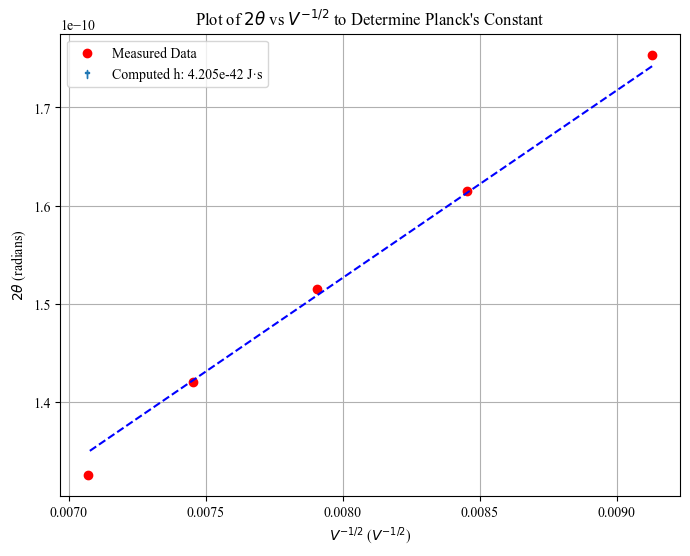

In [97]:
from scipy.optimize import curve_fit

V = np.array([12, 14, 16, 18, 20]) * 1e3  
r = np.array([1.14, 1.05, 0.985, 0.923, 0.862]) * 1e-11 
D = 0.130  
d = 0.40786e-9  
m_e = 9.109e-31  
e = 1.602e-19  

theta = r / D
two_theta = 2 * theta  
V_inv_sqrt = 1 / np.sqrt(V)

def linear_fit(x, m):
    return m * x

params, covariance = curve_fit(linear_fit, V_inv_sqrt, two_theta)
slope = params[0]
h_exp = slope * d * np.sqrt(2 * m_e * e)

plt.figure(figsize=(8, 6))
plt.scatter(V_inv_sqrt, two_theta, color='red', label='Measured Data')
plt.plot(V_inv_sqrt, linear_fit(V_inv_sqrt, slope), color='blue', linestyle='--')

plt.scatter([],[],label=f'Computed h: {h_exp:.3e} J·s', marker='$\dagger$')

plt.xlabel(r'$V^{-1/2}$ ($V^{-1/2}$)')
plt.ylabel(r'$2\theta$ (radians)')
plt.title("Plot of $2\\theta$ vs $V^{-1/2}$ to Determine Planck's Constant")
plt.legend()
plt.grid()
plt.show()
